![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Inteligência Artificial

## Redes Neurais Artificiais

- Professor: Felipe Reis


---
### Importação de bibliotecas 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

#tensorflow
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras

In [52]:
if tf.test.gpu_device_name():
    print('Default GPU Name: {}'.format(device_lib.list_local_devices()))
else:
    print("Please install GPU version of TF")
    print('Acesse o menu Edit > Notebook Settings')
    print('Escolha a opção "Hardware Accelerator: GPU"')
    print('Importe novamente as bibliotecas e execute o código novamente')

Default GPU Name: [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7762465911947956318
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18417015122931155901
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3393585152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10261899201830132510
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:07:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 18104163779626037649
physical_device_desc: "device: XLA_GPU device"
]


In [49]:
#funções úteis 
#Criado por: https://www.tensorflow.org/tutorials/keras/classification
#plota imagens
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

#plota valor do array
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

---
## Perceptron

O código abaixo cria uma classe Perceptron.

A rede é capaz de realizar o treinamento para uma dada entrada de dados e também é capaz de fazer previsões.

O código-fonte é baseado em: https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3

In [4]:
class Perceptron(object):

    #inicialização da classe
    def __init__(self, no_of_inputs, epochs=100, learning_rate=0.01, activation='step'):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1) #+1 para entrada de bias
        #self.weights = np.random.rand(no_of_inputs + 1) - 0.5 #+1 para entrada de bias]
        self.activation_method = 'step'
    
    #método de predição de entradas
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0] #(entrada x pesos) + bias
        
        if(self.activation_method == 'step'):
            if summation > 0:
                activation = 1
            else:
                activation = 0            
            return activation, summation
        
        else:
            return None, None
    
    def predict_out(self, inputs):
        return self.predict(inputs)[0]

    #treinamento da rede neural
    def train(self, training_inputs, labels, verbose=False):
        for epoch in range(self.epochs):
            #imprime predições intermediárias
            if(verbose):
                print('Época #', epoch)
                for inputs in training_inputs:
                    activ, summ = self.predict(inputs)
                    print('Input', inputs, 'Prediction:', activ, 'Intermediary: %.3f' % summ)
            
            for inputs, label in zip(training_inputs, labels):
                prediction, _ = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs  #vetor de pesos
                self.weights[0] += self.learning_rate * (label - prediction)  #bias

### Treinamento Rede Perceptron 

* Considere o treinamento da rede perceptron para uma tabela verdade com 2 entradas

In [6]:
#tabela verdade
training_inputs = np.array([
                [0, 0],
                [0, 1],
                [1, 0],
                [1, 1]], dtype='double')

#resultados esperados
labels = np.array([0, 0, 0, 1]) #and operation
#labels = np.array([0, 1, 1, 1]) #or operation
#labels = np.array([1, 0, 0, 1]) #xor operation

#cria classe perceptron e realiza o treinamento
perceptron = Perceptron(no_of_inputs=2, epochs=20, learning_rate=0.05, activation='step')
perceptron.train(training_inputs, labels, verbose=True)

Época # 0
Input [0. 0.] Prediction: 0 Intermediary: -0.427
Input [0. 1.] Prediction: 0 Intermediary: -0.224
Input [1. 0.] Prediction: 0 Intermediary: -0.584
Input [1. 1.] Prediction: 0 Intermediary: -0.381
Época # 1
Input [0. 0.] Prediction: 0 Intermediary: -0.377
Input [0. 1.] Prediction: 0 Intermediary: -0.124
Input [1. 0.] Prediction: 0 Intermediary: -0.484
Input [1. 1.] Prediction: 0 Intermediary: -0.231
Época # 2
Input [0. 0.] Prediction: 0 Intermediary: -0.327
Input [0. 1.] Prediction: 0 Intermediary: -0.024
Input [1. 0.] Prediction: 0 Intermediary: -0.384
Input [1. 1.] Prediction: 0 Intermediary: -0.081
Época # 3
Input [0. 0.] Prediction: 0 Intermediary: -0.277
Input [0. 1.] Prediction: 1 Intermediary: 0.076
Input [1. 0.] Prediction: 0 Intermediary: -0.284
Input [1. 1.] Prediction: 1 Intermediary: 0.069
Época # 4
Input [0. 0.] Prediction: 0 Intermediary: -0.277
Input [0. 1.] Prediction: 1 Intermediary: 0.076
Input [1. 0.] Prediction: 0 Intermediary: -0.234
Input [1. 1.] Predicti

In [5]:
for inputs in training_inputs:
    print('Input:', inputs, 'Output:', perceptron.predict_out(inputs))

Input: [0. 0.] Output: 0
Input: [0. 1.] Output: 0
Input: [1. 0.] Output: 0
Input: [1. 1.] Output: 1


### Treinamento Rede Perceptron 

* Considere o treinamento da rede perceptron para uma tabela verdade com 3 entradas

In [26]:
#tabela verdade
training_inputs = np.array([
                [0, 0, 0],
                [0, 0, 1],
                [0, 1, 0],
                [0, 1, 1],
                [1, 0, 0],
                [1, 0, 1],
                [1, 1, 0],
                [1, 1, 1]], dtype='double')

#resultados esperados
labels = np.array([0, 0, 0, 0, 0, 0, 0, 1]) #and operation
#labels = np.array([0, 1, 1, 1, 1, 1, 1, 1]) #or operation
#labels = np.array([1, 0, 0, 0, 0, 0, 0, 1]) #xor operation

#cria classe perceptron e realiza o treinamento
perceptron = Perceptron(no_of_inputs=3, epochs=20, learning_rate=0.01, activation='sigmoid')
perceptron.train(training_inputs, labels, verbose=False)

---
## Tensorflow e Keras

### Tensorflow

Tensorflow é uma plataforma de código aberto para aprendizado de máquinas. Para mais informações, acesse o site [https://www.tensorflow.org/](https://www.tensorflow.org/)

### Keras

Keras é uma API criada para facilitar o uso das APIs de aprendizado de máquina, como o Tensorflow. Para mais informações acesse o site [https://keras.io/](https://keras.io/).

### Informações sobre o tutorial a seguir

O código a seguir foi feito com base no tutorial "Treine sua primeira rede neural: classificação básica", disponibilizado na documentação do Tensorflow.

* Material de referência: https://www.tensorflow.org/tutorials/keras/classification

In [27]:
#Impressão de versão do Tensorflow
print('Versão Tensorflow:', tf.__version__)
print('Versão Keras:', keras.__version__)

Versão Tensorflow: 2.2.0
Versão Keras: 2.3.0-tf


### Base de Dados MNIST

O banco de dados MNIST contém dígitos manuscritos (escritos a mão).

Tem um conjunto de treinamento com 60.000 imagens e um conjunto de teste com 10.000 imagens. 

Os dígitos foram normalizados por tamanho e centralizados em uma imagem de tamanho fixo.

A base de dados foi criada por Yann LeCun em 1998.

A base MNIST está disponível em: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)

![MNist](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Para nossos testes, no entanto, iremos usar uma base ligeiramente diferente, recomendada para treinamento inicial de bases de dados pelo tutorial do Tensorflow.

### Base de Dados Fashion MNist

O banco de dados Fashion MNIST contém imagens de roupas, nas seguintes categorias.

0. Camisetas/Top (T-shirt/top)
1. Calça (Trouser)
2. Suéter (Pullover)
3. Vestidos (Dress)
4. Casaco (Coat)
5. Sandálias (Sandal)
6. Camisas (Shirt)
7. Tênis (Sneaker)
8. Bolsa (Bag)
9. Botas (Ankle boot)

Contém  60.000 imagens de treinamento e 10.000 imagens de teste. 
Os dígitos foram normalizados por tamanho e centralizados em uma imagem de tamanho fixo.

A base de dados foi criada pela Zalando Research com objetivo de ser um substituto direto para o conjunto de dados MNIST original. Essa base pode ser usada para benchmarking de algoritmos de aprendizado de máquina.

A base de dados tem licensa MIT e está disponível em [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)

A base de dados também pode ser encontrada no Kaggle: [https://www.kaggle.com/zalando-research/fashionmnist](https://www.kaggle.com/zalando-research/fashionmnist)

![Fashion MNist](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

In [2]:
#download da base de dados
fashion_mnist = keras.datasets.fashion_mnist

#divisão em base de treinamento e testes (subdividido em imagens e labels)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [30]:
#definição das classes 
class_names = ['Camisetas', 'Calças', 'Suéter', 'Vestidos', 'Casacos',
               'Sandálias', 'Camisas', 'Tênis', 'Bolsas', 'Botas']

In [31]:
#informações sobre o tamanho o vetor das imagens (6k imagens, de 28x28)
train_images.shape

(60000, 28, 28)

In [32]:
#imprime os labels de treinamento (nome das classes)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [33]:
#informações sobre o tamanho o vetor das labels (6k labels)
print(train_labels.shape)

(60000,)


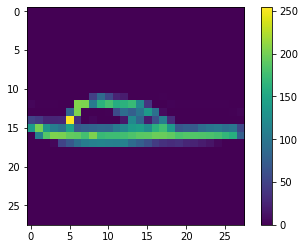

In [35]:
#podemos visualizar algumas imagens do conjunto de treinamento
plt.figure()
plt.imshow(train_images[30])
plt.colorbar()
plt.grid(False)
plt.show()

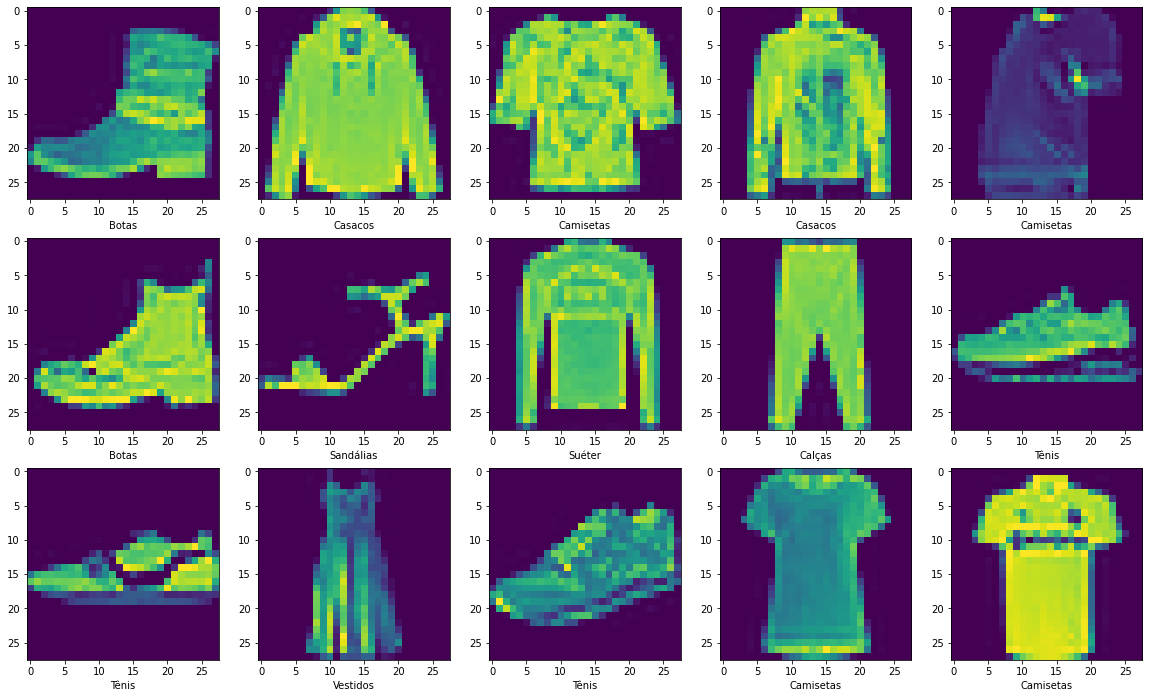

In [37]:
#imprimindo mais algumas imagens aleatórias
fig=plt.figure(figsize=(20, 12))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    idx = random.randrange(0, len(train_images))
    img = train_images[idx]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.xlabel(class_names[train_labels[idx]])
plt.show()

### Pré processamento

Para melhor aprendizar da rede, é necessário normalizar as imagens.

In [38]:
train_images = train_images / 255.0
test_images = test_images / 255.0

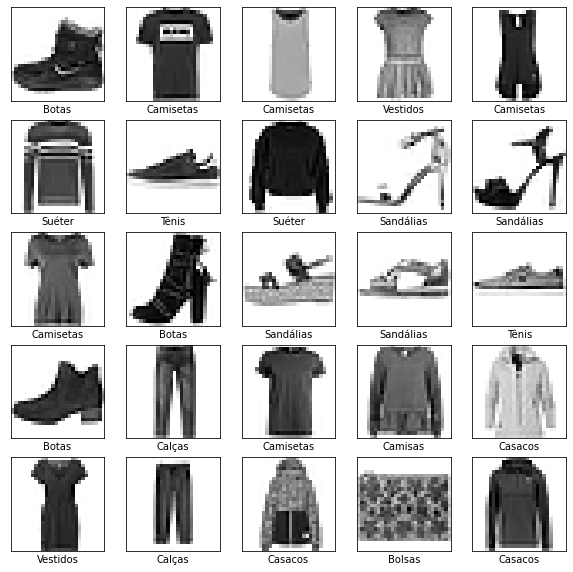

In [39]:
#algumas imagens, em escala cinza
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construção da rede neural

O principal bloco de construção da rede neural é a camada (*layer*). As camadas  extraem representações dos dados inseridos na rede. Na construção de redes, algumas camadas podem ser encadeadas

As camadas, como `tf.keras.layers.Dense`, tem paramêtros que são aprendidos durante o treinamento.

In [40]:
#modelo de rede sequencial
model = keras.Sequential([
    #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
    keras.layers.Flatten(input_shape=(28, 28)), 
    
    #Camada de dados totalmente conectadas, com ativação relu
    #A camada possui 128 nós (neurônios)
    keras.layers.Dense(128, activation='relu'),
    
    #Camada de dados totalmente conectadas, com ativação softmax
    #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
    keras.layers.Dense(10, activation='softmax')
])

### Compilação do modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de compilação:

* *Função Loss*: Essa mede quão preciso é o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.

* *Optimizer*: Técnica para encontrar o ponto mínimo da função de perda, como o método do gradiente.

* *Métricas*: valores usados para  monitorar os passos de treinamento e teste. O exemplo, a acurácia (fração das imagens que foram classificadas corretamente) é utilizada para avaliação do modelo.

In [42]:
#compila o modelo
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Treinamento da rede

Treinar a rede neural requer os seguintes passos:

1. Informe as imagens de treino
2. Informe os *labels* (rótulos / classes) das imagens
3. Defina o número de épocas.

Para começar a treinar, chame o método `model.fit`, assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:o.

In [43]:
#realiza o treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7473 - accuracy: 0.7566
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5154 - accuracy: 0.8247
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4709 - accuracy: 0.8373
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4459 - accuracy: 0.8461
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4286 - accuracy: 0.8520
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4143 - accuracy: 0.8566
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4025 - accuracy: 0.8609
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3926 - accuracy: 0.8638
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3833 - accuracy: 0.8665
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.375

### Avaliação do modelo

Após treinado, é possível avaliar a acurácia do conjunto de testes.

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Acurácia de testes: %.4f', test_acc)

313/313 - 0s - loss: 0.4254 - accuracy: 0.8488
Acurácia de testes: 0.848800003528595


### Predições de imagens

Após treinado, é possível prever cada uma das imagens

In [45]:
#retorna predições de todo o conjunto de imagens de teste
predictions = model.predict(test_images)

#define a imagem a ser predita
num_imagem = 0
prediction = predictions[num_imagem]

#imprime a classe com maior probabilidade
class_pred = np.argmax(prediction)
print('Classe predita: ', class_names[class_pred])

Classe predita:  Botas


In [46]:
#imprime a probabilidade de cada classe para uma dada imagem
for cl, prob in zip(class_names, prediction):
    print(cl, prob)

Camisetas 8.814254e-06
Calças 2.1743238e-06
Suéter 1.8607567e-05
Vestidos 1.7685566e-05
Casacos 1.1380361e-05
Sandálias 0.043969996
Camisas 3.4400044e-05
Tênis 0.12027615
Bolsas 0.0042763893
Botas 0.8313844


In [47]:
#compara a predição com o rótulo correto
print('Classe prevista x classe correta')
print(class_names[class_pred], class_names[test_labels[num_imagem]])

Classe prevista x classe correta
Botas Botas


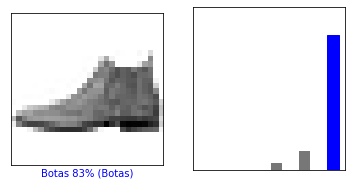

In [50]:
#plota imagem e gráfico de resultados
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(num_imagem, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(num_imagem, predictions,  test_labels)
plt.show()

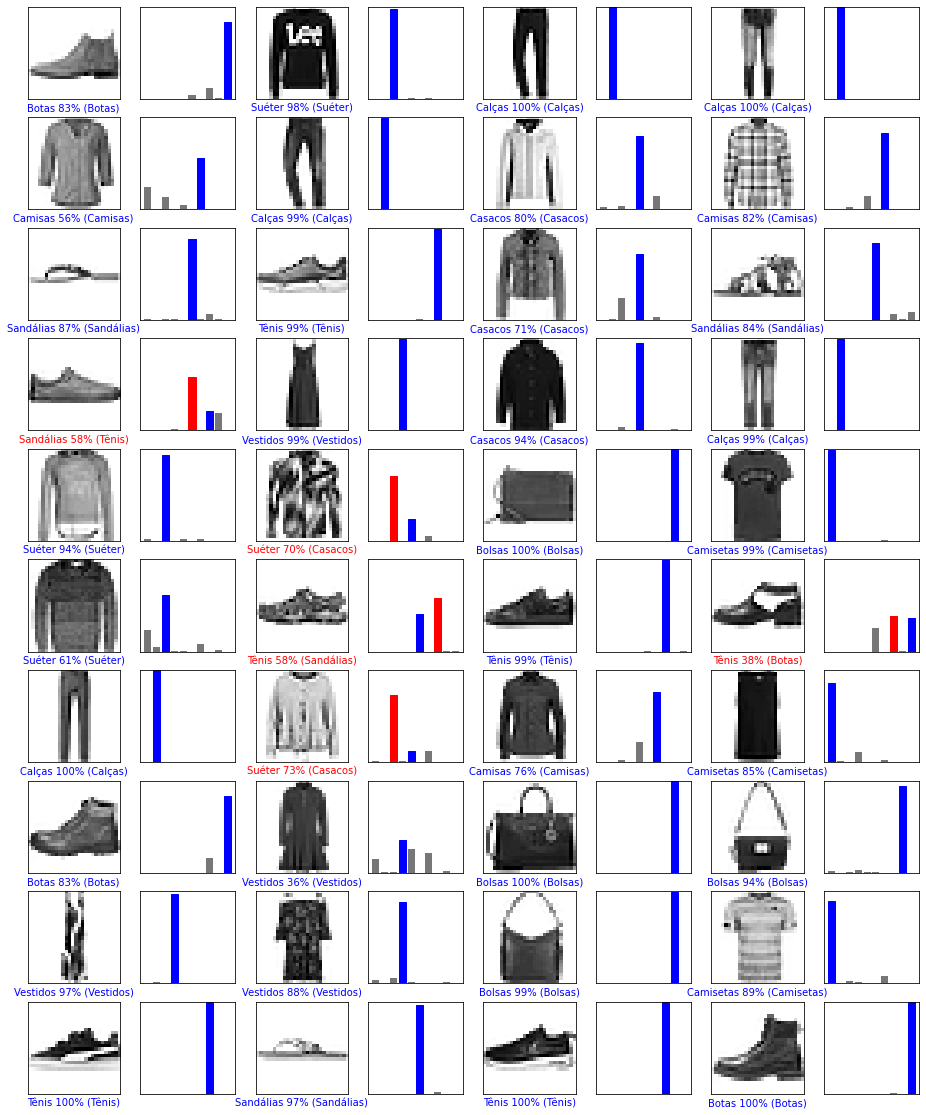

In [51]:
# Plota múltiplas imagens do conjunto de teste, labels preditas e labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 10
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()